In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/sofiiir/eds220-hwk3.git


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

# COMPLETE WORKFLOW

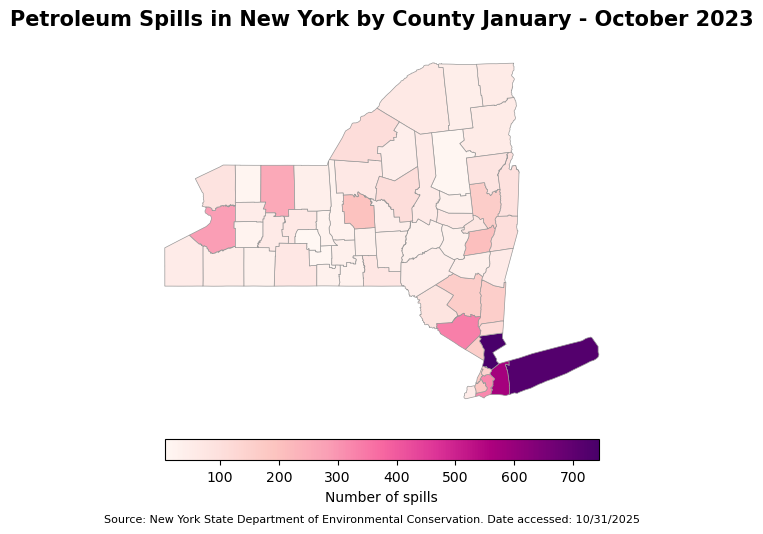

In [2]:
# Load necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Code to address error when reading in data
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

# Read in spills data
fp = os.path.join('data', 'Spill_Incidents_20251031.csv')
spills = pd.read_csv(fp)

# Read in census data 
fp = os.path.join('data', 'census_data_2023', 'tl_2023_us_county.shp')
counties = gpd.read_file(fp)

# Change column names to lower snake
spills.columns = (spills.columns
                  .str.lower()
                  .str.replace(' ', '_'))

# Change data type of spill dates to datetime
spills.spill_date = pd.to_datetime(spills['spill_date'])

# Select observations between January 1, 2023 and Octover 31, 2023 for Petroleum spills
petr_23 =  (spills[(spills['spill_date'] >= '2023-01-01') & 
                   (spills['spill_date']<= '2023-10-31') & 
                   (spills['material_family'] == 'Petroleum')]) 

# Create a new data frame with the number of petroleum spills from Janurary to October 2023
spills_per_county = petr_23.groupby('county').size().to_frame('n_spills').reset_index()

# Change column names to lower snake
counties.columns = (counties.columns
                  .str.lower())

# Subset for only New York 
ny_counties = counties[counties['statefp'] == '36']

# Replace 'St Lawrence' with 'St. Lawrence' 
spills_per_county['county'] = spills_per_county['county'].str.replace('St Lawrence', 'St. Lawrence')

# Remove New Jersey county from the spills data frame since its not in New York
spills_per_county = spills_per_county[~spills_per_county.county.isin(['New Jersey - Region 2'])]

# Change the column name from namesel to county in the ny_counties data frame
ny_counties = ny_counties.rename(columns = {'name':'county'})

# Inner join data frames 
ny_counties = pd.merge(ny_counties,
                       spills_per_county, 
                       how ='inner',
                       on = 'county')

# Add one spill to Niagara County to account for the Tuscarora Indian Reservation spill 
ny_counties.at[45, 'n_spills'] +=1

fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of communities
# Plot with refined color and edge style
ny_counties.plot(
    ax=ax,
    column='n_spills',
    cmap='RdPu',
    legend=True,
    edgecolor="0.6",
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of spills",
        "orientation": "horizontal", # change orientation
        "pad": 0.05
    }
)

# Add title and subtitle for better context
ax.set_title('Petroleum Spills in New York by County January - October 2023', fontsize=15, weight='bold', pad=15)

# Add citatation of data and date of data access
plt.suptitle("Source: New York State Department of Environmental Conservation. Date accessed: 10/31/2025",
            fontsize = 8,
            x = 0.5, 
            y = 0.1) # Move subtitle to the bottom of the map


plt.show()

## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your commit history if you try to push them.

## 2. Datasets description
- Read the metadata for both datsets and write a brief description about each one. Indicate the date sources and date of access.

The New York State Department of Environmental Conservation maintains data from spills across the state. Ninety percent of the spills are petroleum based. Spill reporting is essential to the safety of communities and the environment. This dataset lists the type of spill material, the location of the spill, and the quantity of the spill. One potential limitation of the data is that it is self reported leaving room for misrepresentation of real world events. Additionally, of note, amount spilled may be less than amount of contaminants removed as these final quantities may include contaminated soil.
Accessed October 31, 2025. Source: [data.ny.gov](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk/about_data)

TIGER data comes from the Census Bureau and includes shape files with the geometries in this case of counties.
Accessed October 31, 2025. Source: [https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2023.html#list-tab-790442341](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2023.html#list-tab-790442341)

## 3. Import libraries

In [3]:
# Load necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [4]:
# Code to address error when reading in data
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

In [5]:
# Read in spills data
fp = os.path.join('data', 'Spill_Incidents_20251031.csv')
spills = pd.read_csv(fp)

# Read in census data 
fp = os.path.join('data', 'census_data_2023', 'tl_2023_us_county.shp')
counties = gpd.read_file(fp)

<!-- BEGIN QUESTION -->

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head

b. Check the data types of the columns

c. Check the unique values in the `material_family` column

d. Check the unique values in the `county` column

e. Insert a markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells for preliminary data exploration.

In [6]:
# Check the dataframe's head
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10,Gallons,0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,NaN,0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1,Gallons,0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6,Gallons,6


In [7]:
# Check the data types of the columns
spills.dtypes

Spill Number              int64
Program Facility Name    object
Street 1                 object
Street 2                 object
Locality                 object
County                   object
ZIP Code                 object
SWIS Code                 int64
DEC Region                int64
Spill Date               object
Received Date            object
Contributing Factor      object
Waterbody                object
Source                   object
Close Date               object
Material Name            object
Material Family          object
Quantity                 object
Units                    object
Recovered                object
dtype: object

In [8]:
# Check the unique values in the `material_family` column
spills['Material Family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [9]:
# Check the unique values in the `county` column
spills['County'].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Oneida', 'Wayne', 'Suffolk',
       'Orleans', 'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison',
       'Chemung', 'Seneca', 'Broome', 'Hamilton', 'Washington', 'Steuben',
       'Rensselaer', 'Franklin', 'Columbia', 'Fulton', 'Herkimer',
       'Schoharie', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Tioga', 'Chautauqua', 'Cattaraugus',
       'Wyoming', 'Yates', 'Greene', 'Pennsylvania - Region 9',
       'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

In [10]:
# View column names, data counts per column, and data types
spills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563476 entries, 0 to 563475
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Spill Number           563476 non-null  int64 
 1   Program Facility Name  563470 non-null  object
 2   Street 1               563342 non-null  object
 3   Street 2               43823 non-null   object
 4   Locality               562340 non-null  object
 5   County                 563476 non-null  object
 6   ZIP Code               55187 non-null   object
 7   SWIS Code              563476 non-null  int64 
 8   DEC Region             563476 non-null  int64 
 9   Spill Date             563325 non-null  object
 10  Received Date          563000 non-null  object
 11  Contributing Factor    563476 non-null  object
 12  Waterbody              47483 non-null   object
 13  Source                 563476 non-null  object
 14  Close Date             551882 non-null  object
 15  

All of the data in the spills data frame are objects which should be adjusted for analyzing the data. Dates will need to be changed to datetime objects. A notable issue with the data frame is that some conties outside of New York are included. Counties included that are outside of New York are Pennsylvania, Massachsetts, Conneticut, Vermont, New Jersey, and Canada. Locations outside of New York state will need to be filtered out since New York is this analysis' focal region. Spills of a variety of substances are included in the data frame but this analysis is focused on petroleum spills. This column will need to be filtered. No geometries were included as part of this data frame which is necessary for mapping spills. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.B. Cleaning
a. Simplify column names as needed.

In [11]:
# Change column names to lower snake
spills.columns = (spills.columns
                  .str.lower()
                  .str.replace(' ', '_'))

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Update column data types as needed *for this analysis*.

In [12]:
# Change data type of spill dates to datetime
spills.spill_date = pd.to_datetime(spills['spill_date'])

In [13]:
# View the first 5 rows of spills
spills.head()

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,2001-10-10,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10,Gallons,0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,2004-08-21,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,NaN,0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,2004-08-21,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,2002-08-02,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1,Gallons,0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,2003-01-20,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6,Gallons,6


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [14]:
# Select observations between January 1, 2023 and Octover 31, 2023
petr_23 =  (spills[(spills['spill_date'] >= '2023-01-01') & 
                   (spills['spill_date']<= '2023-10-31') & 
                   (spills['material_family'] == 'Petroleum')] )

# View the new data frame
petr_23

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
221,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,diesel,Petroleum,0,NaN,0
222,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil,Petroleum,0,Gallons,0
223,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,gasoline,Petroleum,0,NaN,0
224,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,kerosene [#1 fuel oil] (on-site consumption),Petroleum,0,NaN,0
225,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,"used oil (heating, on-site consumption)",Petroleum,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562962,2306261,ZHANG RESIDENCE,10 LINCOLN AVE,NaN,ROSLYN,Nassau,NaN,3022,1,2023-10-23,10/23/2023,Equipment Failure,NaN,Private Dwelling,12/01/2023,#2 fuel oil,Petroleum,0,NaN,0
562967,2303072,ZHANG RESIDENCE,93 CHERRY LANE,NaN,HICKSVILLE,Nassau,NaN,3024,1,2023-07-14,07/14/2023,Equipment Failure,NaN,Private Dwelling,09/18/2023,#2 fuel oil,Petroleum,0,NaN,0
563076,2208304,ZIMMERMAN - UST,19 MOUNTAIN AVENUE,NaN,LARCHMONT,Westchester,NaN,6032,3,2023-01-10,01/10/2023,Equipment Failure,NaN,Private Dwelling,NaN,#2 fuel oil,Petroleum,0,NaN,0
563368,2301301,ZULTOWSKY - UST,514 PELHAM MANOR RD,NaN,PELHAM,Westchester,NaN,6044,3,2023-05-16,05/16/2023,Equipment Failure,NaN,Private Dwelling,07/11/2023,#2 fuel oil,Petroleum,0,NaN,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print a message verifying that `petr_23` only has data for 2023 and from January through October.
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`.

In [15]:
# Check that the data includes observations from January through October 2023 only
print(f"The data includes data from the months of {petr_23.spill_date.dt.month_name().unique()} in the year {petr_23.spill_date.dt.year.unique()}")

The data includes data from the months of ['June' 'August' 'September' 'July' 'January' 'February' 'March' 'October'
 'May' 'April'] in the year [2023]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [16]:
# Check that only petroleum spills are in the new data frame
assert petr_23['material_family'].unique() == 'Petroleum'

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Two columns only.
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.

In [17]:
# Create a new data frame with the number of petroleum spills from Janurary to October 2023
spills_per_county = petr_23.groupby('county').size().to_frame('n_spills').reset_index()

# View the new data frame
spills_per_county

,county,n_spills
0,Albany,206
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,744
62,Wyoming,24


In [18]:
grader.check("q5d")

q5d results: All test cases passed!

<!-- BEGIN QUESTION -->

## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head

b. Check the data types of the columns

c. Check the geo-dataframe's CRS

d. Plot the geo-dataframe

e. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells of preliminary data exploration.

This data frame will primarily be used for its geometry. The county names are stored under a different column name than the county name column in the spills data frame. These will have to be changed to match in order to successfully combine the data frames for mapping petroleum spills in New York. 

In [19]:
# Check the county data frame's first 5 rows
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [20]:
# Check the data types of the columns
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [21]:
# Check the geo-dataframe's CRS
counties.crs

<Geographic 2D CRS: GEOGCS["GCS_North_American_1983",DATUM["D_North_Am ...>
Name: NAD83
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

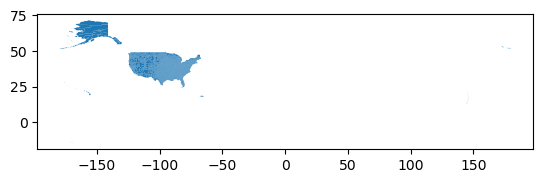

In [22]:
# Plot the geo-dataframe
counties.plot()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [23]:
# Change column names to lower snake
counties.columns = (counties.columns
                  .str.lower())

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them (you may need to look at the metadata).

In [24]:
# Subset for only New York 
ny_counties = counties[counties['statefp'] == '36']

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.


In [25]:
# alphabetical list of the unique county names in counties data frame
sorted(ny_counties['name'].unique())

['Albany',
 'Allegany',
 'Bronx',
 'Broome',
 'Cattaraugus',
 'Cayuga',
 'Chautauqua',
 'Chemung',
 'Chenango',
 'Clinton',
 'Columbia',
 'Cortland',
 'Delaware',
 'Dutchess',
 'Erie',
 'Essex',
 'Franklin',
 'Fulton',
 'Genesee',
 'Greene',
 'Hamilton',
 'Herkimer',
 'Jefferson',
 'Kings',
 'Lewis',
 'Livingston',
 'Madison',
 'Monroe',
 'Montgomery',
 'Nassau',
 'New York',
 'Niagara',
 'Oneida',
 'Onondaga',
 'Ontario',
 'Orange',
 'Orleans',
 'Oswego',
 'Otsego',
 'Putnam',
 'Queens',
 'Rensselaer',
 'Richmond',
 'Rockland',
 'Saratoga',
 'Schenectady',
 'Schoharie',
 'Schuyler',
 'Seneca',
 'St. Lawrence',
 'Steuben',
 'Suffolk',
 'Sullivan',
 'Tioga',
 'Tompkins',
 'Ulster',
 'Warren',
 'Washington',
 'Wayne',
 'Westchester',
 'Wyoming',
 'Yates']

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.

In [26]:
# alphabetical list of the unique county names in spills data frame
sorted(spills_per_county['county'].unique())

['Albany',
 'Allegany',
 'Bronx',
 'Broome',
 'Cattaraugus',
 'Cayuga',
 'Chautauqua',
 'Chemung',
 'Chenango',
 'Clinton',
 'Columbia',
 'Cortland',
 'Delaware',
 'Dutchess',
 'Erie',
 'Essex',
 'Franklin',
 'Fulton',
 'Genesee',
 'Greene',
 'Hamilton',
 'Herkimer',
 'Jefferson',
 'Kings',
 'Lewis',
 'Livingston',
 'Madison',
 'Monroe',
 'Montgomery',
 'Nassau',
 'New Jersey - Region 2',
 'New York',
 'Niagara',
 'Oneida',
 'Onondaga',
 'Ontario',
 'Orange',
 'Orleans',
 'Oswego',
 'Otsego',
 'Putnam',
 'Queens',
 'Rensselaer',
 'Richmond',
 'Rockland',
 'Saratoga',
 'Schenectady',
 'Schoharie',
 'Schuyler',
 'Seneca',
 'St Lawrence',
 'Steuben',
 'Suffolk',
 'Sullivan',
 'Tioga',
 'Tompkins',
 'Tuscarora Indian Reservation',
 'Ulster',
 'Warren',
 'Washington',
 'Wayne',
 'Westchester',
 'Wyoming',
 'Yates']

<!-- END QUESTION -->



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 


In [27]:
# County names that are in the spills data frame but not the ny_counties data frame
diff_names_spills = list(np.setdiff1d(spills_per_county['county'], ny_counties['name']))

# View the list of county names that are in the spills data frame but not the ny_counties data frame
diff_names_spills

['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']

In [28]:
grader.check("7Ac")

7Ac results: All test cases passed!

d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [29]:
# County name that are in the ny_counties data frame but not the spills data frame
diff_names_ny = list(np.setdiff1d(ny_counties['name'], spills_per_county['county']))

# View the list of county names that are in the ny_counties data frame but not the spills data frame
diff_names_ny

['St. Lawrence']

In [30]:
grader.check("7Ad")

7Ad results: All test cases passed!

e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [31]:
# Subest for Tuscarora Indian Reservation
tir = spills_per_county[spills_per_county['county'] == 'Tuscarora Indian Reservation']

# Assign the number of spills to a variable
tir_spills = tir['n_spills']

# View the variable
tir_spills

56    1
Name: n_spills, dtype: int64

There is 1 spill in Tuscarora Indian Reservation.

### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and Verify the update was successful.


In [32]:
# Replace 'St Lawrence' with 'St. Lawrence' 
spills_per_county['county'] = spills_per_county['county'].str.replace('St Lawrence', 'St. Lawrence')

# Check the sorted county values include St. Lawrence
sorted(spills_per_county['county'].unique())

['Albany',
 'Allegany',
 'Bronx',
 'Broome',
 'Cattaraugus',
 'Cayuga',
 'Chautauqua',
 'Chemung',
 'Chenango',
 'Clinton',
 'Columbia',
 'Cortland',
 'Delaware',
 'Dutchess',
 'Erie',
 'Essex',
 'Franklin',
 'Fulton',
 'Genesee',
 'Greene',
 'Hamilton',
 'Herkimer',
 'Jefferson',
 'Kings',
 'Lewis',
 'Livingston',
 'Madison',
 'Monroe',
 'Montgomery',
 'Nassau',
 'New Jersey - Region 2',
 'New York',
 'Niagara',
 'Oneida',
 'Onondaga',
 'Ontario',
 'Orange',
 'Orleans',
 'Oswego',
 'Otsego',
 'Putnam',
 'Queens',
 'Rensselaer',
 'Richmond',
 'Rockland',
 'Saratoga',
 'Schenectady',
 'Schoharie',
 'Schuyler',
 'Seneca',
 'St. Lawrence',
 'Steuben',
 'Suffolk',
 'Sullivan',
 'Tioga',
 'Tompkins',
 'Tuscarora Indian Reservation',
 'Ulster',
 'Warren',
 'Washington',
 'Wayne',
 'Westchester',
 'Wyoming',
 'Yates']

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 


In [33]:
# Remove New Jersey county from the spills data frame since its not in New York
spills_per_county = spills_per_county[~spills_per_county.county.isin(['New Jersey - Region 2'])]


# Change the column name from namesel to county in the ny_counties data frame
ny_counties = ny_counties.rename(columns = {'name':'county'})

In [34]:
# Save a variable with any intersecting columns from the two data frames
common_columns = set(ny_counties.columns).intersection(spills_per_county.columns)

# Check if there are any common columns
if len(common_columns) != 0:
    print(f"Common columns:{common_columns}")
else:
    print("No columns in common")

Common columns:{'county'}


b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [35]:
# Inner join data frames 
ny_counties = pd.merge(ny_counties,
                       spills_per_county, 
                       how ='inner',
                       on = 'county')
# View new data frame
ny_counties

,statefp,countyfp,countyns,geoid,geoidfq,county,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
0,36,101,00974148,36101,0500000US36101,Steuben,Steuben County,06,H1,G4020,236,18500,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",72
1,36,091,00974143,36091,0500000US36091,Saratoga,Saratoga County,06,H1,G4020,104,10580,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",162
2,36,003,00974100,36003,0500000US36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666409356,12990521,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",30
3,36,075,00974136,36075,0500000US36075,Oswego,Oswego County,06,H1,G4020,532,45060,None,A,2464650884,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",68
4,36,111,00974153,36111,0500000US36111,Ulster,Ulster County,06,H1,G4020,408,28740,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,36,051,00974124,36051,0500000US36051,Livingston,Livingston County,06,H1,G4020,464,40380,None,A,1635976564,22076449,+42.7290418,-077.7784630,"POLYGON ((-77.65085 42.58037, -77.65159 42.580...",59
58,36,025,00974111,36025,0500000US36025,Delaware,Delaware County,06,H1,G4020,None,None,None,A,3736306657,64163829,+42.1939865,-074.9667281,"POLYGON ((-74.66969 42.06782, -74.67035 42.067...",41
59,36,071,00974134,36071,0500000US36071,Orange,Orange County,06,H1,G4020,408,28880,None,A,2103272841,67953621,+41.4024096,-074.3062522,"POLYGON ((-74.24491 41.60376, -74.24456 41.603...",336
60,36,093,00974144,36093,0500000US36093,Schenectady,Schenectady County,06,H1,G4020,104,10580,None,A,530089712,12366944,+42.8175516,-074.0435592,"POLYGON ((-73.89962 42.76425, -73.90678 42.763...",78



From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [36]:
# Niagara county is the 45th row and has 88 spills
ny_counties[ny_counties['county'] == 'Niagara']

,statefp,countyfp,countyns,geoid,geoidfq,county,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
45,36,063,00974130,36063,0500000US36063,Niagara,Niagara County,06,H1,G4020,160,15380,None,A,1352876140,1598772310,+43.2726719,-078.8129431,"POLYGON ((-78.49165 43.08396, -78.49179 43.084...",88


In [37]:
# Add one spill to Niagara County to account for the Tuscarora Indian Reservation spill 
ny_counties.at[45, 'n_spills'] +=1

In [38]:
# Check the number of spills in Niagara County is 89
ny_counties.at[45, 'n_spills']

89

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation) and date of access



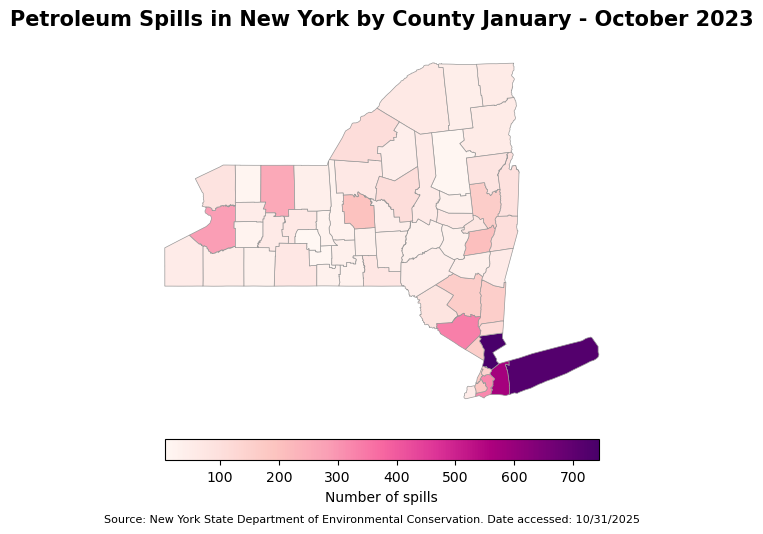

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of communities
# Plot with refined color and edge style
ny_counties.plot(
    ax=ax,
    column='n_spills',
    cmap='RdPu',
    legend=True,
    edgecolor="0.6",
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of spills",
        "orientation": "horizontal", # change orientation
        "pad": 0.05
    }
)

# Add title and subtitle for better context
ax.set_title('Petroleum Spills in New York by County January - October 2023', fontsize=15, weight='bold', pad=15)

# Add citatation of data and date of data access
plt.suptitle("Source: New York State Department of Environmental Conservation. Date accessed: 10/31/2025",
            fontsize = 8,
            x = 0.5, 
            y = 0.1) # Move subtitle to the bottom of the map


plt.show()


b. Write a description of how the map was created, including key takeaways. If you need to do additional data analysis to include relevant information from the data, you may include additional cells here.

The map of New York spills was created by using a data frame containing spills incidents made publicly available by the New York state government. The spills data did not include geometry so county data from the census bureau was combined with the spills data for mapping purposes. Manipulations were performed on these data sets to make sure that they were compatable before merging. Some basic operations included changing data types to appropriate types, changing column names to lower snake, and choosing dates of interest. More involved data frame manipulations included ensuring a column matched from each data frame to successfully complete the merge. In this process, any data in the spills data that was from outside of the state of New York was removed and mismatched names were altered. After matching all of the county names on each data frame there was one missing spill from the Tuscarora Indian Reservation which was added to the Niagara County spills count. A final map is created to view where spills are most frequent in New York state. 

Westchester County, Suffolk County, and Nassau County are the counties with the highest number of spills. These counties are all located in the southern most region of New York state. They are shown in magenta and deep purple on the map. Upstate New York has significantly fewer spills than those counties surrounding New York City. This concentration of spills is correlated to those areas with greater populations that likely have more development. 

In [40]:
# View counties wiht three highest number of spills 
ny_counties.sort_values(by = ['n_spills'], ascending = False).head(3)

,statefp,countyfp,countyns,geoid,geoidfq,county,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
23,36,119,00974157,36119,0500000US36119,Westchester,Westchester County,06,H1,G4020,408,35620,35614,A,1115811940,179391718,+41.1526862,-073.7457526,"POLYGON ((-73.65762 40.98550, -73.65739 40.985...",744
8,36,103,00974149,36103,0500000US36103,Suffolk,Suffolk County,06,H1,G4020,408,35620,35004,A,2359277313,3787417976,+40.9435540,-072.6922183,"POLYGON ((-71.80938 41.20323, -71.79115 41.184...",723
20,36,059,00974128,36059,0500000US36059,Nassau,Nassau County,06,H1,G4020,408,35620,35004,A,736960644,437290665,+40.7296118,-073.5894144,"POLYGON ((-73.78019 40.82640, -73.77498 40.830...",576


## Complete workflow

**STILL WORKING ON THIS**

Collect all the relevant code into a **new notebook** titled `hwk3-task1-spills-COMPLETE-YOURLASTNAME.ipynb`. This notebook should have two sections:the a single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.



**From last HW:**

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.

##### Run the cell below to run all autograder tests. 

In [41]:
grader.check_all()

7Ac results: All test cases passed!

7Ad results: All test cases passed!

q5d results:
    q5d - 1 result:
        ❌ Test case failed
        Trying:
            def test_q3(student_data):
                try:
                    expected_data = pd.read_csv('data/q5d_df.csv').drop(columns='Unnamed: 0')
                    pd.testing.assert_frame_equal(expected_data, student_data)
                except AssertionError:
                    raise AssertionError('Incorrect answer.')
        Expecting nothing
        ok
        Trying:
            test_q3(spills_per_county)
        Expecting nothing
        **********************************************************************
        Line 7, in q5d 0
        Failed example:
            test_q3(spills_per_county)
        Exception raised:
            Traceback (most recent call last):
              File "<doctest q5d 0[0]>", line 4, in test_q3
                pd.testing.assert_frame_equal(expected_data, student_data)
              File "/op